In [3]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/bc/5b/b8d04f920d4be17e938a8ebad48941fbb0b97b1672897178c0d470734fd2/yfinance-0.2.48-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/939.5 kB ? eta -:--:--
     ---------------------------------------- 10.2/939.5 kB ? eta -:--:--
     ---------------------------------------- 10.2/939.5 kB ? eta -:--:--
     - ----------------------------------- 30.7/939.5 kB 186.2 kB/s eta 0:00:05
     - ----------------------------------- 30.7/939.5 kB 186.2

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import skew, kurtosis

In [2]:
class Stock:
    def __init__(self, ticker):
        self.ticker = yf.Ticker(ticker)
        self.data = self.ticker.history(period="10y")
        self.one_year = 252
        
    
    def percentage_years(self):
        self.percentage_per_years = []
        for years in range(10):
            new_data = self.data.iloc[years * self.one_year : years * self.one_year + self.one_year , 3]
            self.percentage_per_years.append( ((new_data.iloc[-1] - new_data.iloc[0]) / new_data.iloc[0]) * 100 )
        return np.array(self.percentage_per_years).reshape(-1,1)
    
    
stocks = ['AAPL','MSFT','AMZN' ,'GOOGL','Meta','TSLA','JPM','JNJ','V','UNH','HD','PG','MA','DIS','PFE','VZ','KO','NFLX','XOM','CSCO','BA','INTC','MRK','NKE','T','WMT','BAC','CVX','ABT','ADBE','ORCL','CMCSA','CRM' ,'IBM' ,'PYPL','AVGO','MCD','HON','SBUX','MMM','BMY','AMD', 'GE' ,'C' ,'QCOM' ,'TXN' ,'LMT' ,'TMO','CAT']

new_data = Stock(stocks[0])
list_of_changes = new_data.percentage_years()
for i in stocks:
    new_data1 = Stock(i)
    list_of_changes1 = new_data1.percentage_years()
    list_of_changes = np.concatenate((list_of_changes ,list_of_changes1 ) , axis = 1)
    
list_of_changes1 = list_of_changes.copy()
list_of_changes

array([[ 1.26613716e+01,  1.26613716e+01,  1.52315847e+01,
         1.05531199e+02,  3.26321082e+01,  3.98348754e+01,
        -1.18718773e+01,  1.05720518e+01, -2.18837258e+00,
         2.54581332e+01,  2.70943376e+01,  3.21239965e+01,
        -9.46809341e+00,  1.89755886e+01,  2.77720411e+01,
         2.00792016e+01, -2.63814386e+00,  4.31313863e+00,
         9.39908792e+01, -7.54306802e+00,  2.06333826e+01,
         2.06982026e+01,  2.35884143e+00, -3.45001094e+00,
         4.19417516e+01,  3.88385039e+00, -2.25903432e+01,
         1.68239377e-03, -1.52438127e+01,  7.16951085e+00,
         2.86082091e+01,  3.37616750e+00,  1.47495047e+01,
         2.45478792e+01, -1.20286912e+01, -9.80660908e-01,
         4.51904857e+01,  2.40137312e+01,  1.11182557e+01,
         6.58298903e+01,  6.93695452e+00,  1.64976994e+01,
        -2.36933748e+01,  1.85784632e+01,  9.67923185e-01,
        -2.03785118e+01,  1.67600665e+01,  1.92285025e+01,
         1.41710269e+01, -2.30484174e+01],
       [-7.09

First approach: Calculate the average growth of all large companies together and plot the graph over a specific time period.

Second approach: The growth rate of each stock each year should be considered separately as data.

mean of first approach 18.950270960568893
std of first approach 13.63533388606275
Skewness of first approach -1.2844100417297417
kurtosis of first approach 1.2609209169304822
------------------------------------------------------------------
mean of second approach 18.950270960568893
std of second approach 41.56140348610614
Skewness of second approach 5.280374251689228
kurtosis of second approach 62.23881614621024


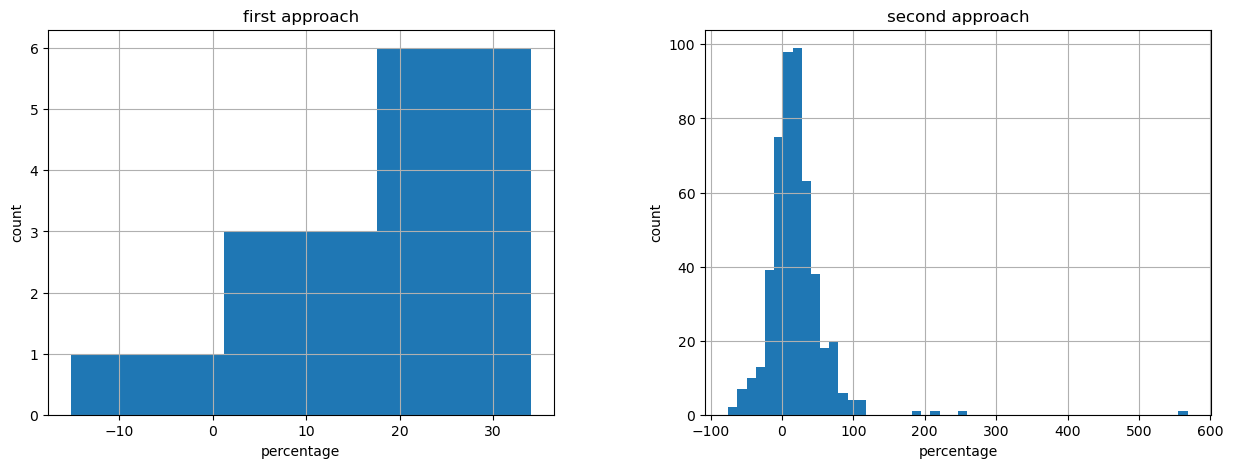

In [77]:
fig , axes = plt.subplots(nrows = 1, ncols = 2 , figsize = (15,5))

pd.DataFrame(list_of_changes.mean(axis = 1)).hist(bins = 3 , ax = axes[0])
axes[0].set_title('first approach')
axes[0].set_ylabel('count')
axes[0].set_xlabel('percentage')

pd.DataFrame(list_of_changes.ravel()).hist(bins = 50 , ax = axes[1])
axes[1].set_title('second approach')
axes[1].set_ylabel('count')
axes[1].set_xlabel('percentage')

print(f'mean of first approach {list_of_changes.mean(axis = 1).mean()}')
print(f'std of first approach {list_of_changes.mean(axis = 1).std()}')
print(f'Skewness of first approach {skew(list_of_changes.mean(axis = 1))}')
print(f'kurtosis of first approach {kurtosis(list_of_changes.mean(axis = 1))}')

print('------------------------------------------------------------------')

print(f'mean of second approach {list_of_changes.ravel().mean()}')
print(f'std of second approach {list_of_changes.ravel().std()}')
print(f'Skewness of second approach {skew(list_of_changes.ravel())}')
print(f'kurtosis of second approach {kurtosis(list_of_changes.ravel())}')